In [1]:
import os
if not os.environ.get("PREAMBLE_RUN", False): 
    %run -i '../preamble.py' 2

In [2]:
import pandas as pd
from src.constants import PATH_ALL_SPEECHES

In [ ]:
df = pd.read_parquet(PATH_ALL_SPEECHES)
df["speechlen"] = df["text"].map(lambda s: len(s.split(" ")))

## 1: There is an odd number of speeches per year

<Axes: title={'center': 'Number of speeches per year'}, xlabel='year'>

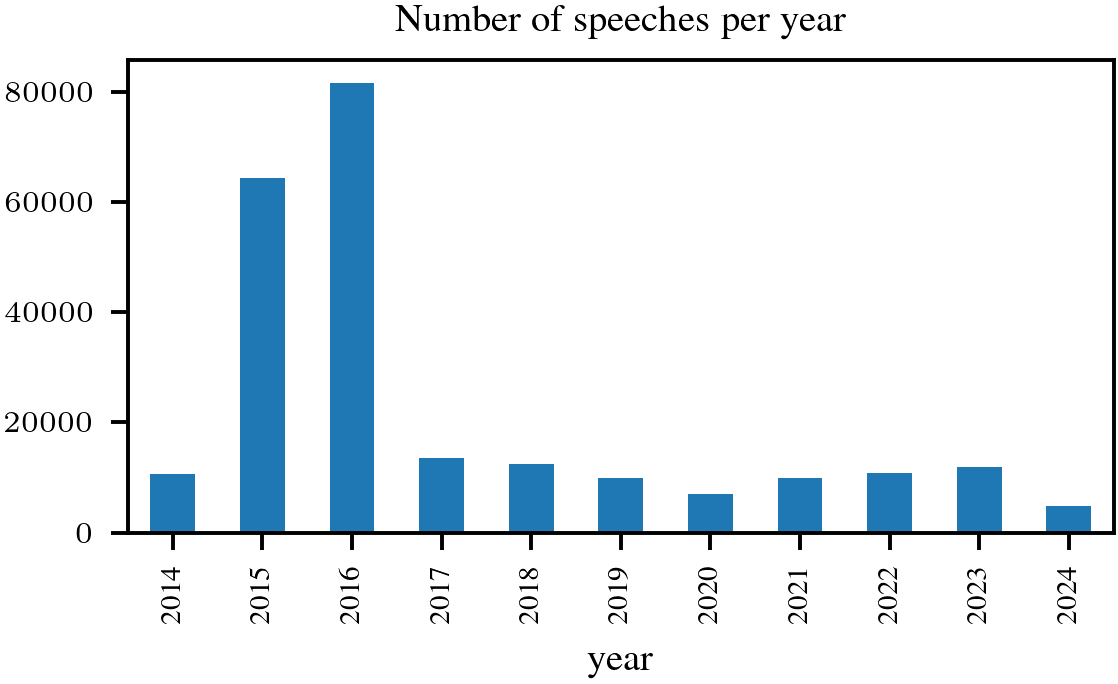

In [ ]:
n_speeches_per_year = df.groupby("year").size()
n_speeches_per_year.plot.bar(title="Number of speeches per year")

In [ ]:
other_year_sizes = n_speeches_per_year[[2014, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]]
print("Mean n speeches in 2015 and 2016: ", n_speeches_per_year[[2015, 2016]].mean())
print("Mean n speeches in other years (except '15/'16): ", other_year_sizes.mean())
print("Std of speeches in other years (except '15/'16): ", other_year_sizes.std())
print("Mean n speeches in all years: ", n_speeches_per_year.mean())

Mean n speeches in 2015 and 2016:  72964.0
Mean n speeches in other years (except '15/'16):  10098.222222222223
Std of speeches in other years (except '15/'16):  2724.4255714635415
Mean n speeches in all years:  21528.363636363636


=> This is odd. Looking at the aggregated data is misleading, lets look at the individual dates

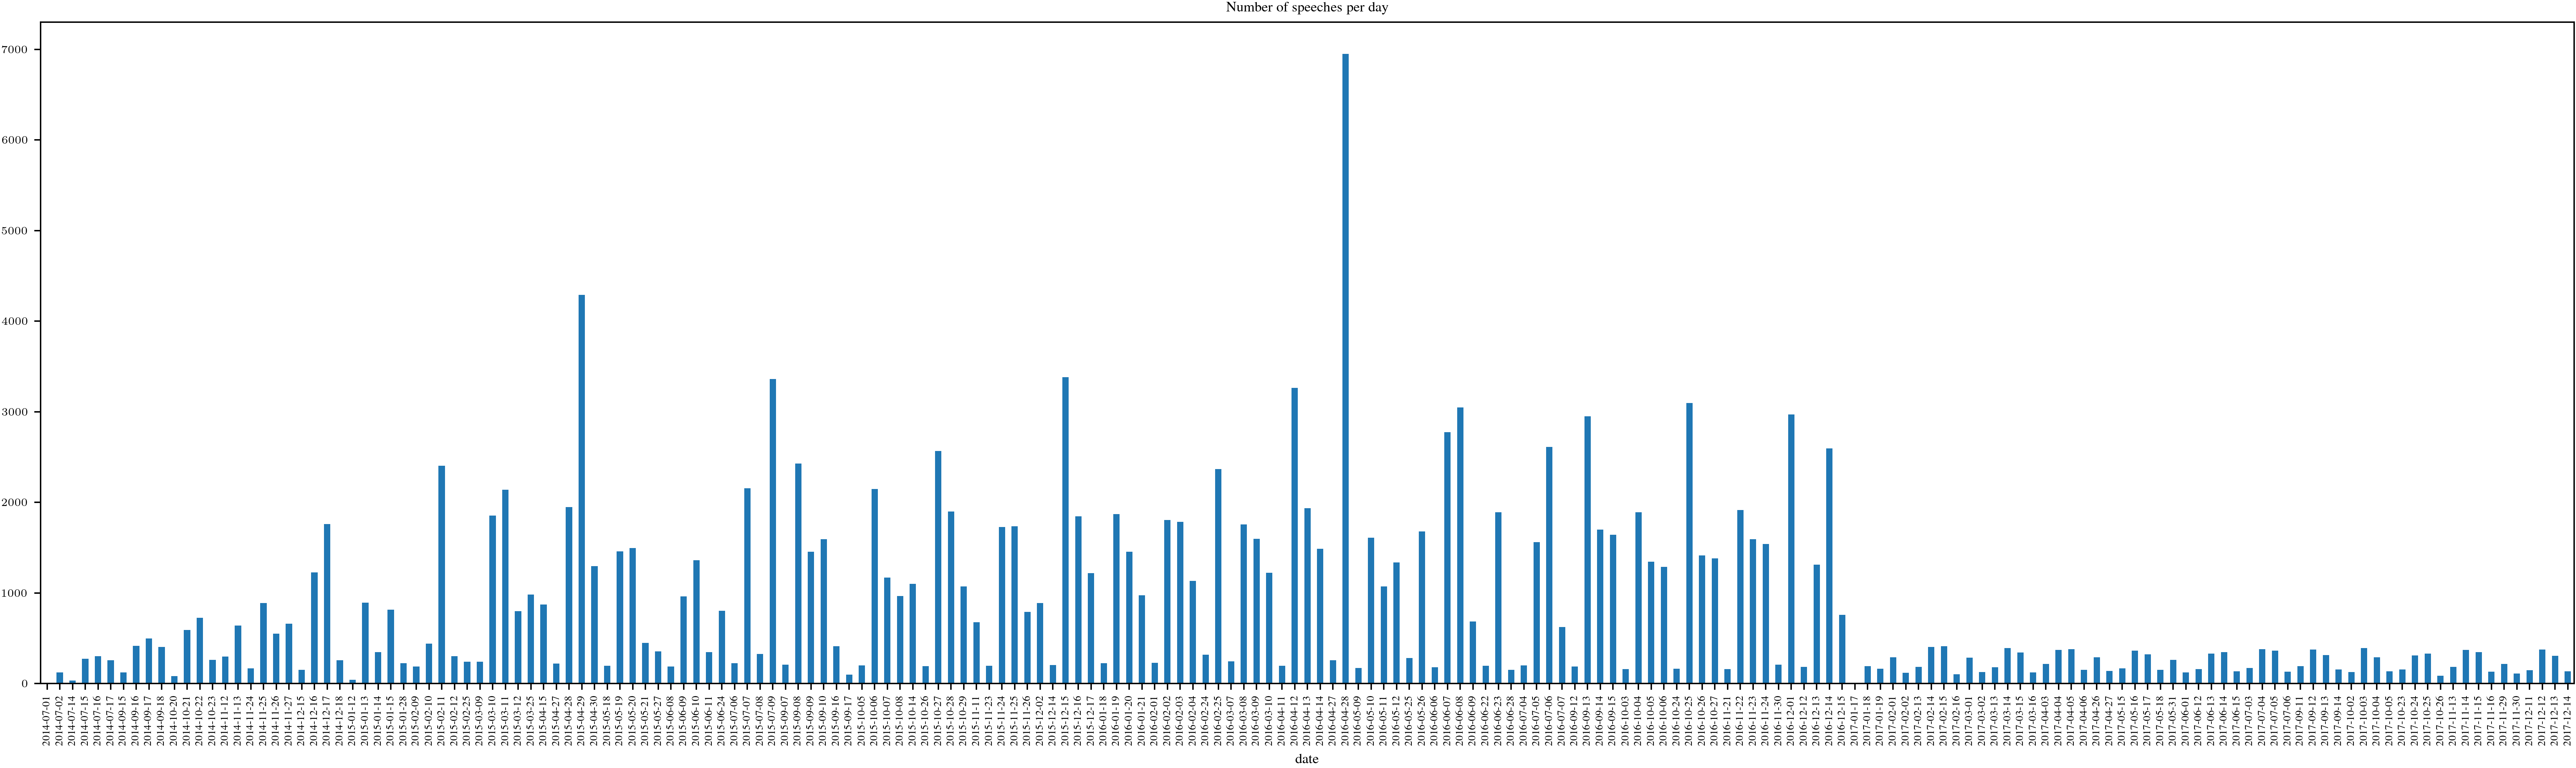

In [ ]:
df_2014_to_2017 = df[(df["year"] >= 2014) & (df["year"] <= 2017)]

df_2014_to_2017.groupby("date").size().plot.bar(figsize=(20, 6), title="Number of speeches per day")
None

=> there are two anomalies: 
1) some dates have a surprisingly high number of speeches
2) after a certain date (exactly the end of 2016) - starting on the 17/01/2017, the number of speeches per day changed systematically

In [ ]:
top_3_dates = df_2014_to_2017.groupby("date").size().sort_values(ascending=False).head(3)
print("Top 3 dates with highest number of speeches")
print(top_3_dates)

Top 3 dates with highest number of speeches
date
2016-04-28    6951
2015-04-29    4290
2015-12-15    3380
dtype: int64


Note that the two top dates are exactly one year apart. 
Incidentally, on these two dates (28/04/2016 and 29/04/2015) the EU parliament held budgetary discussions, which apparently were quite-speech intensive

- https://www.europarl.europa.eu/doceo/document/OJQ-8-2016-04-28_EN.html
- https://www.europarl.europa.eu/doceo/document/OJQ-8-2015-04-29_EN.html

What changed after 2016? The European parliament dis-established so-called written-declarations. 

- written declaration definition: "... not more than 200 words relating exclusively to a matter falling within the competence of the European Union. The contents of such a declaration may not go beyond the form of a declaration. In particular, it may not call for any legislative action, contain any decision on matters for which specific procedures and competences are laid down in these Rules of Procedure or deal with the subject of ongoing proceedings in Parliament" (https://www.europarl.europa.eu/doceo/document/RULES-8-2016-07-15_EN.pdf) => RULE 136
- this rule was removed on 13/12/2016: (https://www.europarl.europa.eu/doceo/document/TA-8-2016-0484_EN.pdf)
=> from then on, written declarations were no longer possible

<Axes: title={'center': 'Number of written speeches per year'}, xlabel='year'>

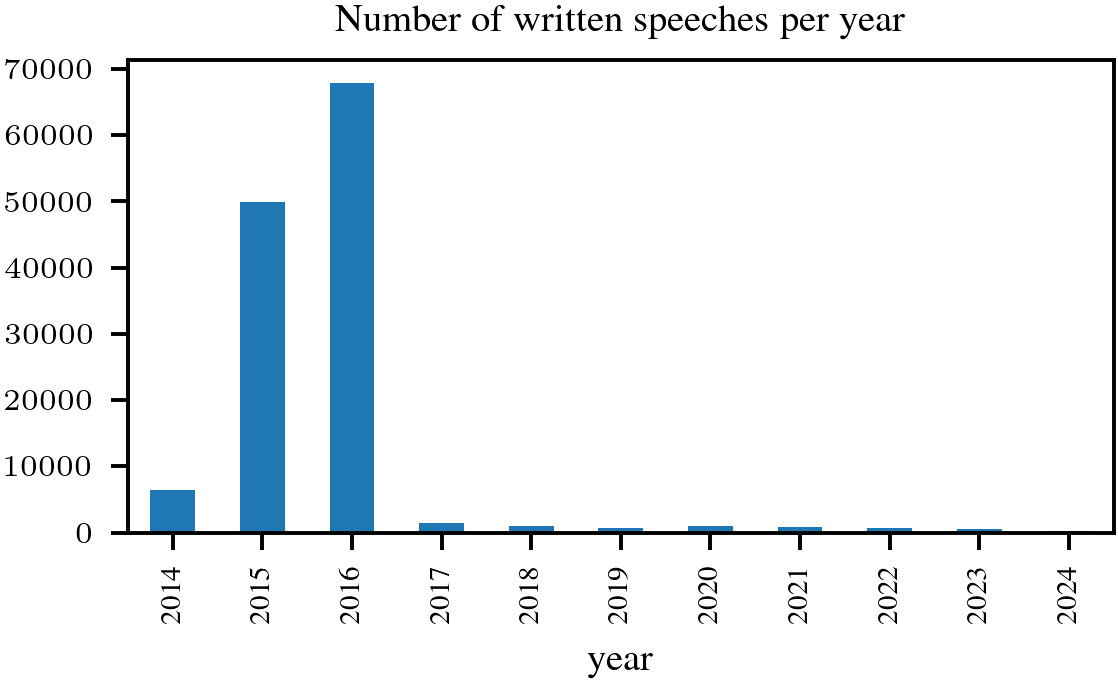

In [ ]:
df[df["written"]].groupby("year").size().plot.bar(title="Number of written speeches per year")

=> so in the years 2015 and 2016 there was a drastic surge in written speeches that was capped with abolishing written declarations

(Note that there are still written speeches after 2016, but no longer written *declarations*)

Mean n non-written speeches in 2015 and 2016:  14064.5
Mean n non-written speeches in all years:  9680.818181818182


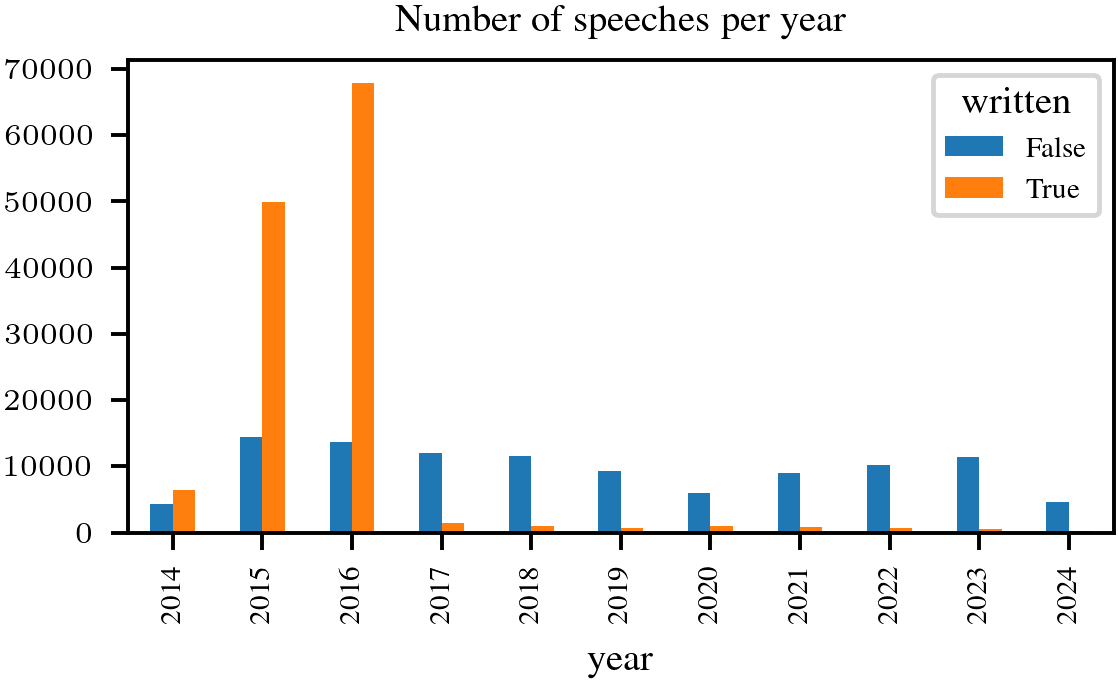

In [ ]:
df.groupby(["year", "written"]).size().unstack().plot.bar(title="Number of speeches per year")

n_non_written_per_year = df[~ df["written"]].groupby("year").size()
print("Mean n non-written speeches in 2015 and 2016: ", n_non_written_per_year[[2015, 2016]].mean())
print("Mean n non-written speeches in all years: ", n_non_written_per_year.mean())

=> if we split up the speeches into written and non-written, we can see that this fully explains our 2015/2016 phenomenon.
=> so what to do about these written declarations? We keep them! They still express meaningful party positions. However, we have to make sure that having more data in 2015&16  does not bias our analyses